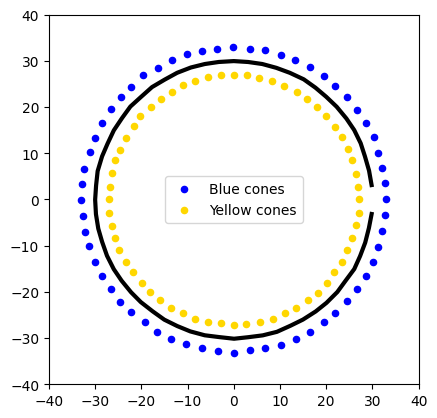

In [10]:
import csv
import math
import numpy as np
import matplotlib.animation as anime
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

with open("cones.csv", "r") as f:
    csv_read = list(csv.reader(f))

bp = np.array([[float(x[0]), float(x[1])] for x in csv_read if x[2] == "blue"])
yp = np.array([[float(x[0]), float(x[1])] for x in csv_read if x[2] == "yellow"])

def find_theta(x, y):
    theta = math.atan2(y, x)
    if theta < 0:
        theta += 2 * math.pi
    return theta

bpaa = np.array([[bp[i, 0], bp[i, 1], find_theta(bp[i, 0], bp[i, 1])] for i in range(len(bp))])
ordered_blue = bpaa[bpaa[:, 2].argsort()]
ypaa = np.array([[yp[i, 0], yp[i, 1], find_theta(yp[i, 0], yp[i, 1])] for i in range(len(yp))])
ordered_yellow = ypaa[ypaa[:, 2].argsort()]

N = min(len(ordered_blue), len(ordered_yellow))
track_centre = np.array([
    [0.5 * (ordered_blue[i, 0] + ordered_yellow[i, 0]),
     0.5 * (ordered_blue[i, 1] + ordered_yellow[i, 1])]
    for i in range(N-1, 0, -1)
])

fig, ax = plt.subplots()
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_aspect("equal")

ax.scatter(ordered_blue[:, 0], ordered_blue[:, 1], c='blue', s=20, label='Blue cones')
ax.scatter(ordered_yellow[:, 0], ordered_yellow[:, 1], c='gold', s=20, label='Yellow cones')
ax.legend()


line, = ax.plot([], [], lw=3, color="black")

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = track_centre[:i+1, 0]
    y = track_centre[:i+1, 1]
    line.set_data(x, y)
    return (line,)

anim = anime.FuncAnimation(fig, animate, init_func=init, frames=len(track_centre), interval=20, blit=True)

# See in nb
from IPython.display import HTML
HTML(anim.to_jshtml())

anim.save(
    "Racing Sim.gif",
    writer=PillowWriter(fps=30)
)
